the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


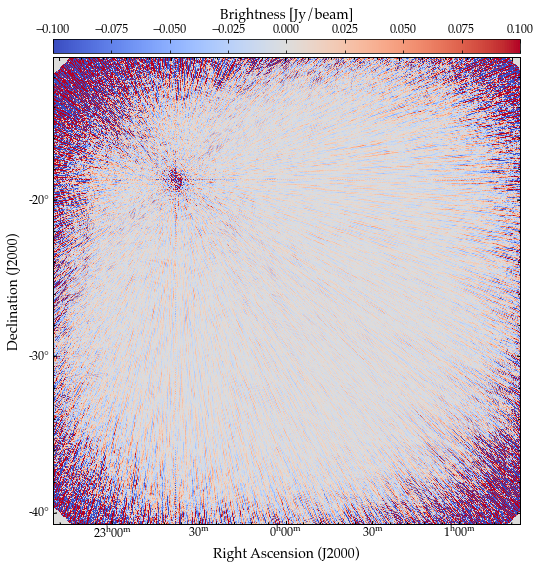

In [61]:
#!/usr/bin/env python
import numpy as np
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.wcs import WCS
import pylab as pl
import aplpy
from matplotlib.colors import ListedColormap
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
rc('font',**{'family':'serif','serif':['Palatino']})
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm
import glob
from astropy import wcs
from astropy.cosmology import LambdaCDM
import os
import subprocess as sp


my_cosmo = LambdaCDM(67.8, 0.308, 0.692)
str_to_beam = (0.0559529*(np.pi/180))**2

path = "/Users/ruby/Astro/polarized_source_sims_Feb2022/fhd_rlb_polarized_source_sim_optimal_weighting_Mar2021/output_data"
filename_stokes_i = "polarized_source_MWA_sim_results_optimal_Dirty_I"
fitslist = [
    f"{path}/{filename_stokes_i}.fits"
]

for f in fitslist:
    fh = fits.getheader(f)
    fd = fits.getdata(f)

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']

    for hi in hitems:
        try:
            fh.remove(hi)
        except:
            pass
    fh.set('NAXIS',2)
    fh.set('WCSAXES',2)

    fits.writeto(f.replace('.fits','.2ax.fits'),\
        #fd[:,:], header=fh, overwrite=True)
        fd[:,:]*str_to_beam, header=fh, overwrite=True)


# Get image centre coordinates
fh = fits.getheader(f"{path}/{filename_stokes_i}.2ax.fits")
ra_cent  = fh['CRVAL1']
dec_cent = fh['CRVAL2']
imsz     = 30.

vmin=-.1
vmax=.1
cmap='coolwarm'#'gnuplot2'#

# Plot a 1x3 Figure
fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(f"{path}/{filename_stokes_i}.2ax.fits", figure=fig, subplot=(1,2,1))
f1.recenter(ra_cent, dec_cent, height=imsz, width=imsz)
f1.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
f1.axis_labels.set_ytext('Declination (J2000)')
f1.axis_labels.set_xtext('Right Ascension (J2000)')
f1.tick_labels.set_yformat('dd')
f1.tick_labels.set_xformat('hh:mm')
f1.axis_labels.set_font(size=14)
f1.tick_labels.set_font(size=12)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.add_colorbar(location='top')
f1.colorbar.set_axis_label_text(r'Brightness [Jy/beam]')
f1.colorbar.set_font(size=12)
f1.colorbar.set_axis_label_font(size=14)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

pl.tight_layout()
pl.savefig('/Users/ruby/Downloads/test_image5.png', bbox_inches='tight', dpi=128)

In [56]:
import sys
sys.path.append('/Users/ruby/Astro/rlb_LWA')
import plot_fits

In [57]:
image = plot_fits.load_fits(f"{path}/{filename_stokes_i}.fits")

In [58]:
if False:
    image_span = 100
    x_center = 1150
    y_center = 1151
    image.crop_image(
        new_x_range=[x_center - image_span / 2, x_center + image_span / 2],
        new_y_range=[y_center - image_span / 2, y_center + image_span / 2],
        inplace=True
    )

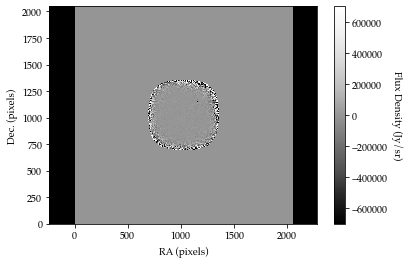

In [60]:
image.plot(signal_extent=[-7e5, 7e5])

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Surface Brightness (Jy/sr)')

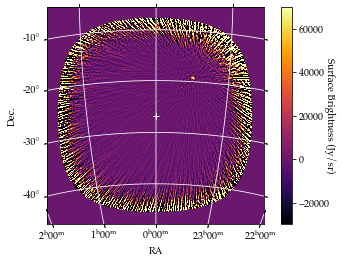

In [109]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits

filename = get_pkg_data_filename(f"{path}/{filename_stokes_i}.fits")

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-3e4, vmax=7e4, origin='lower', cmap='inferno', interpolation=None)
plt.grid(color='white', ls='solid')
plt.xlim([2048-650, 650])
plt.ylim([650,2048-650])
plt.plot(2048/2, 2048/2, '+', color='white')
plt.xlabel('RA')
plt.ylabel('Dec.')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Surface Brightness (Jy/sr)', rotation=270, labelpad=5)

In [97]:
2048-2*650

748

In [101]:
650/2048

0.3173828125